<a href="https://colab.research.google.com/github/arjit195/lab-Assignment/blob/main/Lab_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# Install necessary libraries
!pip install --upgrade pycaret

In [74]:
# Import required libraries
from pycaret.regression import *
import pandas as pd

In [83]:
# Load the dataset
data=pd.read_csv('Fuel_cell_performance_data-Full.csv')

In [84]:
# Specify the target column
target_column = 'Target4'

In [85]:
# Drop other unnecessary target columns
data = data.drop(columns=['Target1', 'Target2', 'Target3', 'Target5'])

In [86]:
# Verify the dataset after dropping columns
print("Dataset Columns:", data.columns)
print("\nFirst few rows of the dataset:")
print(data.head())  # Print the first few rows to ensure the data is correct

Dataset Columns: Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'Target4'],
      dtype='object')

First few rows of the dataset:
     F1    F2    F3     F4      F5    F6     F7     F8   F9   F10      F11  \
0  52.9  1.33  49.1  37.13  129.43  35.0  0.281  112.7  207  0.55   98.971   
1  87.6  2.12  48.8  42.10  171.07  37.6  0.153  157.4  188  0.86  101.179   
2  73.3  2.72  93.8  20.11  163.69  44.3  0.367  348.7  270  1.87   98.919   
3  65.6  2.58  48.1  35.11   63.37  32.5  0.279  321.2  322  1.75  101.560   
4  39.6  2.58  49.3  32.93   63.40  47.0  0.149  205.6  203  1.55   98.148   

    F12   F13   F14   F15  Target4  
0  2.87  1362  15.9   429     4.19  
1  2.34  5130  26.1  1819     5.19  
2  2.13  7811  16.7  1763     7.77  
3  2.91  1641  32.1   203     8.40  
4  1.93  7648  27.5   276     4.75  


In [87]:
# Setup PyCaret regression environment
reg_setup = setup(
    data=data,
    target=target_column,
    session_id=42,  # Set session_id for reproducibility
    train_size=0.7,  # Use a 70/30 split for training and testing
    normalize=True,  # Normalize features (scaling)
    transformation=True,  # Apply transformations to improve model performance
)

,Description,Value
0,Session id,42
1,Target,Target4
2,Target type,Regression
3,Original data shape,"(1000, 16)"
4,Transformed data shape,"(1000, 16)"
5,Transformed train set shape,"(700, 16)"
6,Transformed test set shape,"(300, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [88]:
# Compare all models and select the best one
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
omp,Orthogonal Matching Pursuit,2.0168,5.4339,2.3273,-0.0306,0.3700,0.4501,0.1270
llar,Lasso Least Angle Regression,2.0177,5.4477,2.3310,-0.0344,0.3704,0.4504,0.1320
lasso,Lasso Regression,2.0177,5.4477,2.3310,-0.0344,0.3704,0.4504,0.0790
dummy,Dummy Regressor,2.0177,5.4477,2.3310,-0.0344,0.3704,0.4504,0.0740
en,Elastic Net,2.0177,5.4477,2.3310,-0.0344,0.3704,0.4504,0.0750
br,Bayesian Ridge,2.0214,5.4701,2.3356,-0.0386,0.3710,0.4510,0.1310
ada,AdaBoost Regressor,2.0262,5.5351,2.3484,-0.0490,0.3725,0.4504,0.1550
ridge,Ridge Regression,2.0239,5.5356,2.3490,-0.0504,0.3725,0.4502,0.0780
lar,Least Angle Regression,2.0239,5.5360,2.3491,-0.0505,0.3725,0.4502,0.0770
lr,Linear Regression,2.0239,5.5360,2.3491,-0.0505,0.3725,0.4502,0.5120


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [89]:
# Display the best model's details
print("\nBest Model:")
print(best_model)


Best Model:
OrthogonalMatchingPursuit()


In [90]:
# Finalize the best model
final_model = finalize_model(best_model)

In [91]:
# Save the finalized model for future use
save_model(final_model, 'best_fuel_cell_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['F1', 'F2', 'F3', 'F4', 'F5', 'F6',
                                              'F7', 'F8', 'F9', 'F10', 'F11',
                                              'F12', 'F13', 'F14', 'F15'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('transformation',
                  TransformerWrapper(transformer=PowerTransformer(standardize=False))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('actual_estimator', OrthogonalMatchingPursuit())]),
 'best_fuel_cell_model.pkl')

In [92]:
# Evaluate the model using built-in PyCaret visualizations
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [93]:
# Generate predictions on the test set
predictions = predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,1.8633,4.7188,2.1723,0.0205,0.3557,0.4338


In [94]:
# Display the first few predictions
print("\nFirst few predictions on the test set:")
print(predictions.head())


First few predictions on the test set:
            F1    F2         F3         F4          F5         F6     F7  \
521  53.299999  2.96  39.799999  29.850000  132.610001  39.200001  0.168   
737  79.400002  1.34  67.699997  38.540001   95.220001  31.799999  0.100   
740  57.400002  2.64  57.200001  47.099998  153.100006  46.599998  0.156   
660  52.299999  2.27  64.099998  29.330000  123.169998  30.000000  0.266   
411  87.199997  1.24  40.599998  15.390000   40.860001  32.099998  0.202   

             F8   F9   F10         F11   F12   F13        F14   F15  Target4  \
521  250.199997  148  0.99   98.070000  2.33  5382  23.500000  1706     7.80   
737  163.300003  198  0.99  102.834999  2.15  7648  26.299999  1675     8.44   
740  268.100006  294  1.73  101.441002  1.90   852  25.799999  1203     3.65   
660  108.099998  385  1.54  100.304001  2.82  8513  18.400000  1641     2.90   
411  232.600006  302  1.54   99.363998  2.82  5708  23.100000   428     4.63   

     prediction_label 

In [95]:
# Generate predictions for unseen data
unseen_data = data.sample(5)  # Example new data
new_predictions = predict_model(final_model, data=unseen_data)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Orthogonal Matching Pursuit,2.1819,5.1776,2.2754,-0.0409,0.3669,0.4835


In [96]:
# Display predictions for unseen data
print("\nPredictions on unseen data:")
print(new_predictions)


Predictions on unseen data:
            F1    F2         F3         F4          F5         F6     F7  \
521  53.299999  2.96  39.799999  29.850000  132.610001  39.200001  0.168   
737  79.400002  1.34  67.699997  38.540001   95.220001  31.799999  0.100   
740  57.400002  2.64  57.200001  47.099998  153.100006  46.599998  0.156   
660  52.299999  2.27  64.099998  29.330000  123.169998  30.000000  0.266   
411  87.199997  1.24  40.599998  15.390000   40.860001  32.099998  0.202   

             F8   F9   F10         F11   F12   F13        F14   F15  Target4  \
521  250.199997  148  0.99   98.070000  2.33  5382  23.500000  1706     7.80   
737  163.300003  198  0.99  102.834999  2.15  7648  26.299999  1675     8.44   
740  268.100006  294  1.73  101.441002  1.90   852  25.799999  1203     3.65   
660  108.099998  385  1.54  100.304001  2.82  8513  18.400000  1641     2.90   
411  232.600006  302  1.54   99.363998  2.82  5708  23.100000   428     4.63   

     prediction_label  
521      

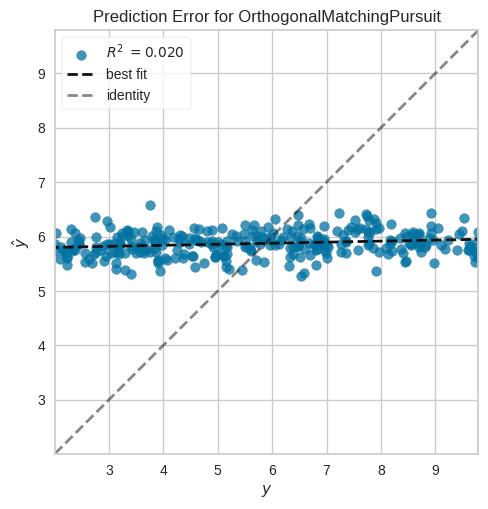

In [97]:
# Prediction Error Plot (compares predicted vs actual)
plot_model(final_model, plot='error')